Chapter 18

# 定积分
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码计算并可视化了函数

$$
f(x) = x^2 + \frac{1}{2}
$$

在区间 $[a, b]$ 上的定积分。定积分可以理解为该函数在区间 $[a, b]$ 上方与 $x$ 轴之间的面积。具体来说，代码首先通过计算不定积分 $\int f(x) \, dx$ 得到函数的原函数，并在上下限 $a = 0$ 和 $b = 1$ 处代入计算：

$$
\int_a^b f(x) \, dx = F(b) - F(a)
$$

其中 $F(x)$ 是 $f(x)$ 的原函数。在计算出定积分值后，代码在图形上绘制出函数曲线，标记积分上下限 $a$ 和 $b$，并在区间 $[a, b]$ 内填充颜色来直观展示积分区域的面积。图形标题中显示的数值即为该积分区域的面积。通过这种方式，代码展示了定积分的几何意义，即在特定区间内，函数与 $x$ 轴之间的区域面积。

## 导入包

In [1]:
import numpy as np
from sympy import *  # 导入符号计算库
from matplotlib import pyplot as plt  # 导入绘图库

In [2]:
x = Symbol('x')  # 定义符号变量 x

## 定义函数和积分

In [3]:
f_x = x**2 + 1/2  # 定义函数 f(x) = x^2 + 1/2
# f_x = x**2 - 1/2  # 可选函数 f(x) = x^2 - 1/2
f_x

x**2 + 0.5

In [4]:
f_x_fcn = lambdify([x], f_x)  # 将符号函数 f(x) 转换为可数值计算的函数

In [5]:
integral_f_x = integrate(f_x, x)  # 计算 f(x) 的不定积分
integral_f_x

0.333333333333333*x**3 + 0.5*x

In [6]:
integral_f_x_fcn = lambdify([x], integral_f_x)  # 将不定积分转换为数值函数

## 参数

In [7]:
a = 0  # 积分下限
b = 1  # 积分上限

num = 201  # 网格数量
x_array = np.linspace(-0.2, 1.2, num)  # x 的取值范围
x_a_b_array = np.linspace(a, b, num)  # 积分区间内的 x 取值范围

In [8]:
y_array = f_x_fcn(x_array)  # 计算函数在 x_array 上的值
y_a_b_array = f_x_fcn(x_a_b_array)  # 计算函数在积分区间 [a, b] 内的值

## 计算定积分值

In [9]:
integral_a_b = integral_f_x_fcn(b) - integral_f_x_fcn(a)  # 使用不定积分计算积分值
integral_a_b

0.833333333333333

In [10]:
integral_a_b_v2 = integrate(f_x, (x, a, b))  # 使用定积分公式计算积分值
integral_a_b_v2

0.833333333333333

In [11]:
integral_a_b_v2 = float(integral_a_b_v2)  # 将结果转换为浮点数
integral_a_b_v2

0.8333333333333333

## 绘制函数和积分区间

Text(0.5, 1.0, '$\\int_a^b  f(x) = 0.8333$')

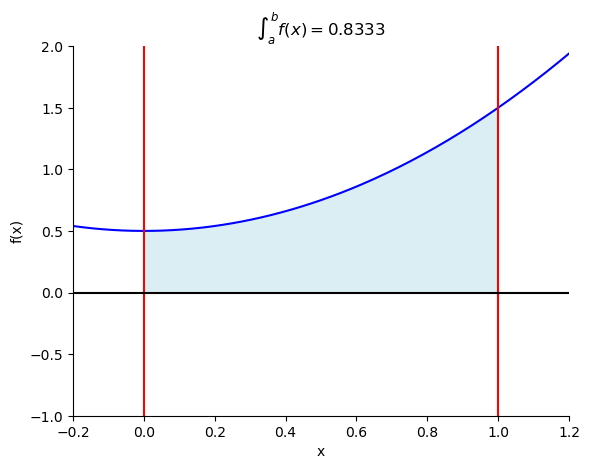

In [12]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, 'b')  # 绘制函数曲线
ax.axvline(x=a, color='r', linestyle='-')  # 绘制积分下限 a
ax.axvline(x=b, color='r', linestyle='-')  # 绘制积分上限 b
ax.axhline(y=0, color='k', linestyle='-')  # 添加 y=0 参考线

ax.fill_between(x_a_b_array,
                y_a_b_array, 
                edgecolor='none', 
                facecolor='#DBEEF3')  # 在积分区间 [a, b] 内填充颜色

ax.set_xlim(-0.2, 1.2)  # 设置 x 轴范围
ax.set_ylim(-1, 2)  # 设置 y 轴范围
plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
plt.gca().spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f(x)')  # 设置 y 轴标签
ax.set_title(r'$\int_a^b  f(x) = %0.4f$' % integral_a_b)  # 在标题中显示积分结果